In [ ]:
# код для объединения всех таблиц в один большой датасет

import os
import pandas as pd


files = [f for f in os.listdir('.') if f.endswith('.csv')]
all_cities_df = pd.DataFrame()

for file_name in files:
    city_name = file_name.split('_')[0] # робофейс для разделения названия
    week_status = file_name.split('_')[1].split('.')[0]

    current_df = pd.read_csv(file_name)

    current_df['city'] = city_name
    current_df['week_status'] = week_status

    all_cities_df = pd.concat([all_cities_df, current_df], ignore_index=True)

    # Колонка 'Unnamed: 0' представляет собой индекс в каждом файле.
    # Не вижу смысла держать её в новом датасете
    all_cities_df = all_cities_df.drop(['Unnamed: 0'], axis=1)

all_cities_df.to_csv('all_cities.csv', index=False)

In [ ]:
# код для работы с готовым общим датасетом и всеми библиотеками

import pandas as pd
import numpy as np
import seaborn as sns # уже на море хочется
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

all_cities_df = pd.read_csv('all_cities.csv')

In [ ]:
all_cities_df

realSum        room_type  room_shared  room_private  \
0      296.159940     Private room        False          True   
1      288.237487     Private room        False          True   
2      211.343089     Private room        False          True   
3      298.956100  Entire home/apt        False         False   
4      247.926181  Entire home/apt        False         False   
...           ...              ...          ...           ...   
51702  125.252620  Entire home/apt        False         False   
51703  115.147812  Entire home/apt        False         False   
51704  194.106312  Entire home/apt        False         False   
51705  169.196785  Entire home/apt        False         False   
51706  136.767401  Entire home/apt        False         False   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                  2.0               True      0    0                10.0   
1                  2.0               True      0    0                10.0   
2                  2.0              False      0    0                10.0   
3                  2.0              False      0    1                 9.0   
4                  4.0              False      0    0                 7.0   
...                ...                ...    ...  ...                 ...   
51702              4.0              False      1    0                 9.0   
51703              4.0              False      0    1                10.0   
51704              2.0              False      0    0                10.0   
51705              6.0              False      0    1                 2.0   
51706              3.0               True      0    0                10.0   

       guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                            97.0  ...  0.699821    0.193709  518.478947   
1                            97.0  ...  2.100005    0.107221  873.216962   
2                            94.0  ...  3.302325    0.234724  444.556077   
3                            91.0  ...  0.547567    0.195997  542.142014   
4                            82.0  ...  1.197921    0.103573  406.928958   
...                           ...  ...       ...         ...         ...   
51702                        86.0  ...  0.873765    0.249505  211.862902   
51703                        95.0  ...  0.848468    0.227851  243.410062   
51704                       100.0  ...  2.661352    0.985169  100.821179   
51705                        40.0  ...  0.861198    0.478868  221.524602   
51706                        93.0  ...  1.112083    0.401976  179.521529   

       attr_index_norm   rest_index  rest_index_norm       lng       lat  \
0            25.239380  1218.662228        71.608028   2.35385  48.86282   
1            42.507907  1000.543327        58.791463   2.32436  48.85902   
2            21.640840   902.854467        53.051310   2.31714  48.87475   
3            26.391291  1199.184166        70.463506   2.35600  48.86100   
4            19.809165  1070.775497        62.918272   2.35915  48.86648   
...                ...          ...              ...       ...       ...   
51702        12.634381   521.104305        39.459621  19.06284  47.49329   
51703        14.515686   630.096583        47.712852  19.05592  47.49101   
51704         6.012441   186.553378        14.126396  19.06871  47.47672   
51705        13.210553   696.233715        52.720959  19.06514  47.50087   
51706        10.705713   472.093349        35.748361  19.06701  47.49355   

           city week_status  
0         paris    weekdays  
1         paris    weekdays  
2         paris    weekdays  
3         paris    weekdays  
4         paris    weekdays  
...         ...         ...  
51702  budapest    weekdays  
51703  budapest    weekdays  
51704  budapest    weekdays  
51705  budapest    weekdays  
51706  budapest    weekdays  

[51707 rows x 21 columns]

# Описательная статистика

In [ ]:
#Всего линий в обьединенном датасете
all_cities_df.shape[0]

51707

In [ ]:
all_cities_df.head()

realSum        room_type  room_shared  room_private  person_capacity  \
0  296.159940     Private room        False          True              2.0   
1  288.237487     Private room        False          True              2.0   
2  211.343089     Private room        False          True              2.0   
3  298.956100  Entire home/apt        False         False              2.0   
4  247.926181  Entire home/apt        False         False              4.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0               True      0    0                10.0   
1               True      0    0                10.0   
2              False      0    0                10.0   
3              False      0    1                 9.0   
4              False      0    0                 7.0   

   guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                        97.0  ...  0.699821    0.193709  518.478947   
1                        97.0  ...  2.100005    0.107221  873.216962   
2                        94.0  ...  3.302325    0.234724  444.556077   
3                        91.0  ...  0.547567    0.195997  542.142014   
4                        82.0  ...  1.197921    0.103573  406.928958   

   attr_index_norm   rest_index  rest_index_norm      lng       lat   city  \
0        25.239380  1218.662228        71.608028  2.35385  48.86282  paris   
1        42.507907  1000.543327        58.791463  2.32436  48.85902  paris   
2        21.640840   902.854467        53.051310  2.31714  48.87475  paris   
3        26.391291  1199.184166        70.463506  2.35600  48.86100  paris   
4        19.809165  1070.775497        62.918272  2.35915  48.86648  paris   

  week_status  
0    weekdays  
1    weekdays  
2    weekdays  
3    weekdays  
4    weekdays  

[5 rows x 21 columns]

In [ ]:
all_cities_df.describe()

realSum  person_capacity         multi           biz  \
count  51707.000000     51707.000000  51707.000000  51707.000000   
mean     279.879591         3.161661      0.291353      0.350204   
std      327.948386         1.298545      0.454390      0.477038   
min       34.779339         2.000000      0.000000      0.000000   
25%      148.752174         2.000000      0.000000      0.000000   
50%      211.343089         3.000000      0.000000      0.000000   
75%      319.694287         4.000000      1.000000      1.000000   
max    18545.450285         6.000000      1.000000      1.000000   

       cleanliness_rating  guest_satisfaction_overall     bedrooms  \
count        51707.000000                51707.000000  51707.00000   
mean             9.390624                   92.628232      1.15876   
std              0.954868                    8.945531      0.62741   
min              2.000000                   20.000000      0.00000   
25%              9.000000                   90.000000      1.00000   
50%             10.000000                   95.000000      1.00000   
75%             10.000000                   99.000000      1.00000   
max             10.000000                  100.000000     10.00000   

               dist    metro_dist    attr_index  attr_index_norm  \
count  51707.000000  51707.000000  51707.000000     51707.000000   
mean       3.191285      0.681540    294.204105        13.423792   
std        2.393803      0.858023    224.754123         9.807985   
min        0.015045      0.002301     15.152201         0.926301   
25%        1.453142      0.248480    136.797385         6.380926   
50%        2.613538      0.413269    234.331748        11.468305   
75%        4.263077      0.737840    385.756381        17.415082   
max       25.284557     14.273577   4513.563486       100.000000   

         rest_index  rest_index_norm           lng           lat  
count  51707.000000     51707.000000  51707.000000  51707.000000  
mean     626.856696        22.786177      7.426068     45.671128  
std      497.920226        17.804096      9.799725      5.249263  
min       19.576924         0.592757     -9.226340     37.953000  
25%      250.854114         8.751480     -0.072500     41.399510  
50%      522.052783        17.542238      4.873000     47.506690  
75%      832.628988        32.964603     13.518825     51.471885  
max     6696.156772       100.000000     23.786020     52.641410

london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelona    2833
berlin       2484
amsterdam    2080
Name: city, dtype: int64


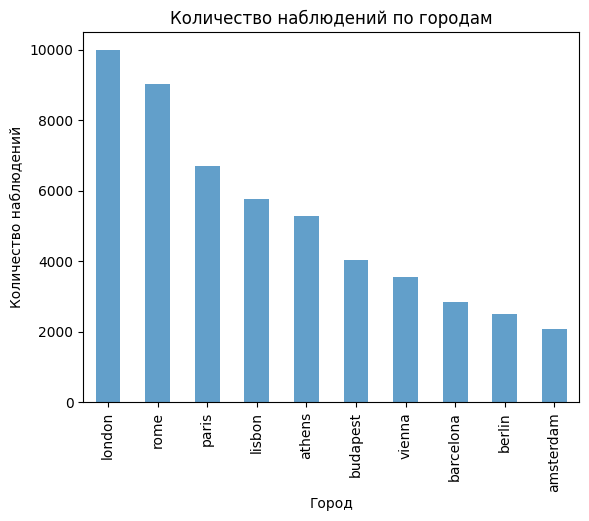

In [ ]:
#Посмотрим распредленеие наблюдений по городам
city_counts = all_cities_df['city'].value_counts()

print(city_counts)

city_counts.plot(kind='bar', alpha=0.7)
plt.xlabel('Город')
plt.ylabel('Количество наблюдений')
plt.title('Количество наблюдений по городам')
plt.show()

In [ ]:
# а теперь по городам и статусу недели
grouped_data = all_cities_df.groupby(['city', 'week_status']).size().reset_index(name='count')
grouped_data

city week_status  count
0   amsterdam    weekdays   1103
1   amsterdam    weekends    977
2      athens    weekdays   2653
3      athens    weekends   2627
4   barcelona    weekdays   1555
5   barcelona    weekends   1278
6      berlin    weekdays   1284
7      berlin    weekends   1200
8    budapest    weekdays   2074
9    budapest    weekends   1948
10     lisbon    weekdays   2857
11     lisbon    weekends   2906
12     london    weekdays   4614
13     london    weekends   5379
14      paris    weekdays   3130
15      paris    weekends   3558
16       rome    weekdays   4492
17       rome    weekends   4535
18     vienna    weekdays   1738
19     vienna    weekends   1799

In [ ]:
#перевернем таблицу чтобы создать колонку для будних дней и для выходных
table = pd.pivot_table(grouped_data, values='count', index=['city'],
                       columns=['week_status'])
table

week_status  weekdays  weekends
city                           
amsterdam        1103       977
athens           2653      2627
barcelona        1555      1278
berlin           1284      1200
budapest         2074      1948
lisbon           2857      2906
london           4614      5379
paris            3130      3558
rome             4492      4535
vienna           1738      1799

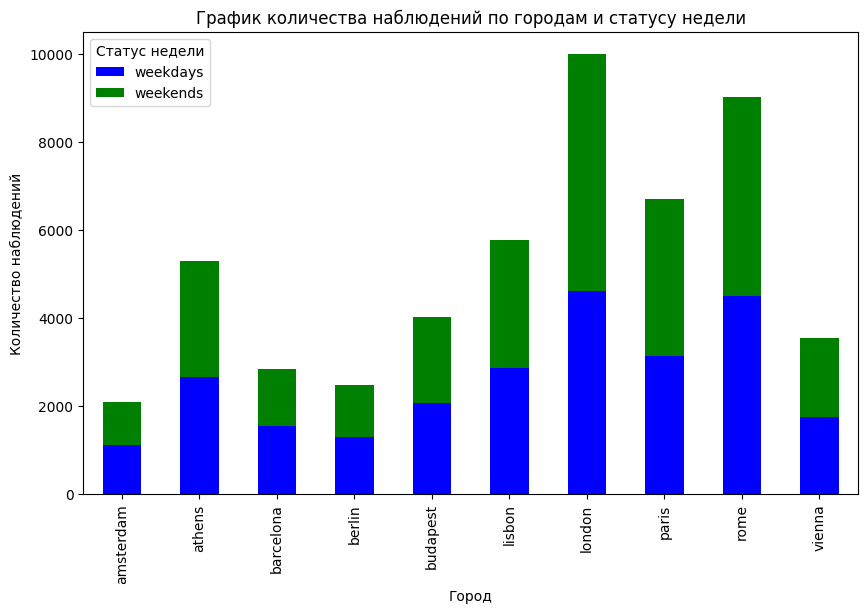

In [ ]:
#Добавим график
colors = ['blue', 'green']
table.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('График количества наблюдений по городам и статусу недели')
plt.xlabel('Город')
plt.ylabel('Количество наблюдений')
plt.legend(title='Статус недели')
plt.show()

In [ ]:
#средний уровень удовлетворенности по городам
all_cities_df.groupby('city')['guest_satisfaction_overall'].mean()

city
amsterdam    94.514423
athens       95.003598
barcelona    91.109072
berlin       94.323671
budapest     94.585281
lisbon       91.093875
london       90.645652
paris        92.037530
rome         93.122300
vienna       93.731128
Name: guest_satisfaction_overall, dtype: float64

In [ ]:
# средняя чистота по городам
all_cities_df.groupby('city')['cleanliness_rating'].mean()

city
amsterdam    9.465865
athens       9.638447
barcelona    9.291564
berlin       9.461755
budapest     9.477374
lisbon       9.370640
london       9.175023
paris        9.263606
rome         9.514678
vienna       9.472434
Name: cleanliness_rating, dtype: float64

In [ ]:
#средняя цена по городам
all_cities_df.groupby('city')['realSum'].mean()

city
amsterdam    573.112795
athens       151.744121
barcelona    293.753706
berlin       244.583752
budapest     176.513548
lisbon       238.210479
london       362.469256
paris        392.531403
rome         205.391950
vienna       241.582484
Name: realSum, dtype: float64

Средняя цена очень отличается, надо будет проверить на выбросы и распределение

In [ ]:
type_columns = all_cities_df.dtypes
print(type_columns)

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
city                           object
week_status                    object
dtype: object


In [ ]:
list_columns = all_cities_df.columns.tolist()
list_columns

['realSum',
 'room_type',
 'room_shared',
 'room_private',
 'person_capacity',
 'host_is_superhost',
 'multi',
 'biz',
 'cleanliness_rating',
 'guest_satisfaction_overall',
 'bedrooms',
 'dist',
 'metro_dist',
 'attr_index',
 'attr_index_norm',
 'rest_index',
 'rest_index_norm',
 'lng',
 'lat',
 'city',
 'week_status']

In [ ]:
all_cities_df.isna().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
week_status                   0
dtype: int64

In [ ]:
# нет пропусков в данных, нет нужды удалять или пропускать неплоные строки.

In [ ]:
print(all_cities_df['city'].unique())

['paris' 'rome' 'amsterdam' 'berlin' 'lisbon' 'vienna' 'london' 'budapest'
 'athens' 'barcelona']


# Корреляционная матрица

<ipython-input-26-42891d375d97>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = all_cities_df.corr(method='kendall')


<Axes: >

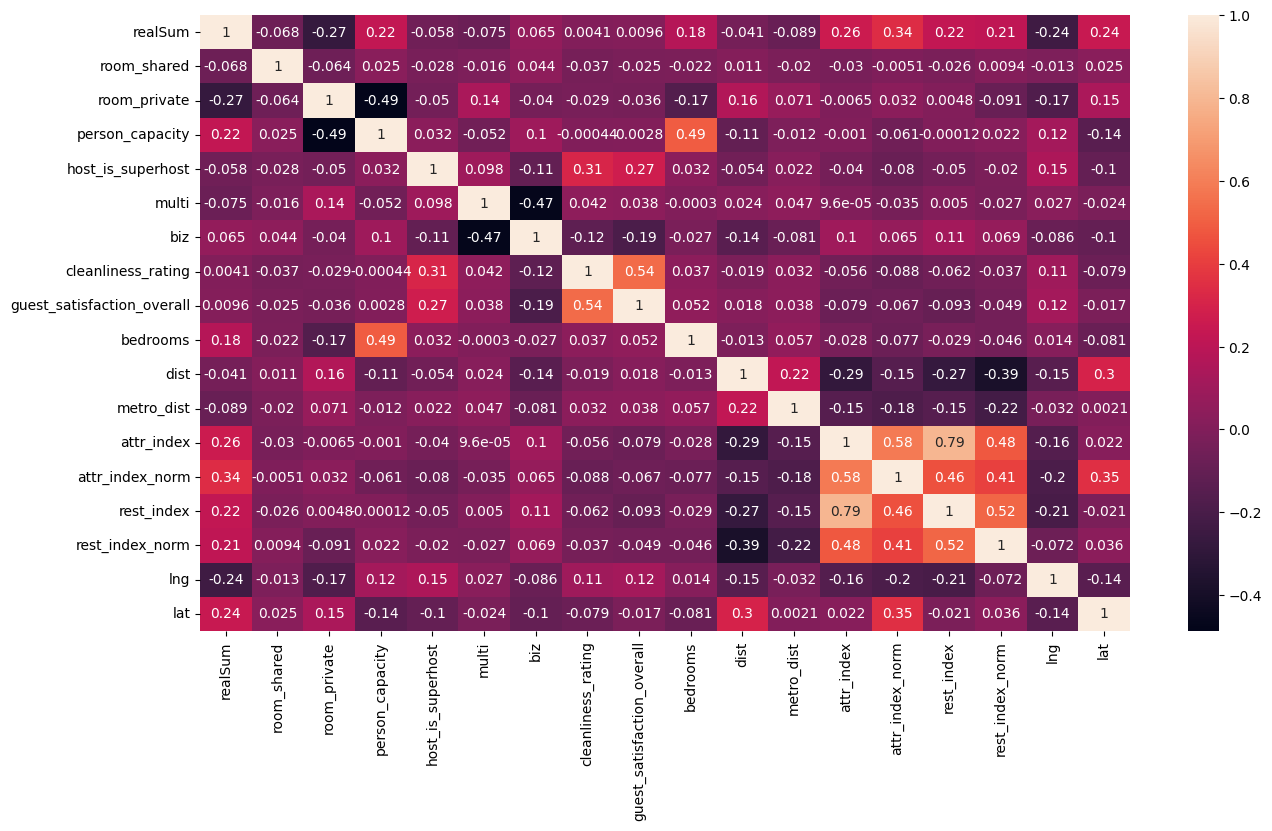

In [ ]:
corr = all_cities_df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

# Правда что в центре города приятнее остановиться ?

In [ ]:
paris = all_cities_df[all_cities_df['city']=='paris']

In [ ]:
paris.describe()

realSum  person_capacity        multi          biz  \
count   6688.000000      6688.000000  6688.000000  6688.000000   
mean     392.531403         2.953648     0.219498     0.245813   
std      330.949745         1.215007     0.413937     0.430601   
min       92.739305         2.000000     0.000000     0.000000   
25%      240.935782         2.000000     0.000000     0.000000   
50%      317.597167         2.000000     0.000000     0.000000   
75%      462.065430         4.000000     0.000000     0.000000   
max    16445.614689         6.000000     1.000000     1.000000   

       cleanliness_rating  guest_satisfaction_overall     bedrooms  \
count         6688.000000                 6688.000000  6688.000000   
mean             9.263606                   92.037530     0.972787   
std              0.974036                    8.818201     0.642571   
min              2.000000                   20.000000     0.000000   
25%              9.000000                   89.000000     1.000000   
50%              9.000000                   94.000000     1.000000   
75%             10.000000                   98.000000     1.000000   
max             10.000000                  100.000000     5.000000   

              dist   metro_dist   attr_index  attr_index_norm   rest_index  \
count  6688.000000  6688.000000  6688.000000      6688.000000  6688.000000   
mean      2.995823     0.227323   374.186582        18.204358   818.768769   
std       1.463542     0.122769   159.494728         7.759372   283.504311   
min       0.071543     0.003220   116.297506         5.654976   258.674400   
25%       1.831552     0.142363   262.319584        12.764097   594.578584   
50%       2.997026     0.207317   337.941264        16.448810   771.165470   
75%       4.050558     0.290475   456.269714        22.202119  1036.566156   
max       7.703737     1.154777  2056.552199       100.000000  2167.677121   

       rest_index_norm          lng          lat  
count      6688.000000  6688.000000  6688.000000  
mean         42.589111     2.343033    48.864343  
std          15.680438     0.033724     0.017405  
min          11.933258     2.247880    48.819940  
25%          30.156870     2.322468    48.852000  
50%          40.373716     2.346460    48.866080  
75%          53.072238     2.367052    48.877870  
max         100.000000     2.438590    48.901060

Париж

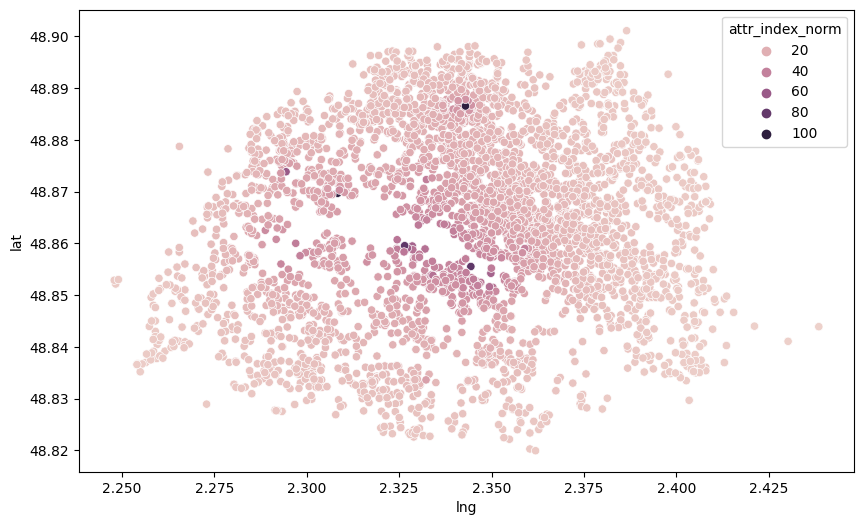

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.scatterplot(data=paris, x='lng', y='lat', hue='attr_index_norm')
plt.show()

Лондон

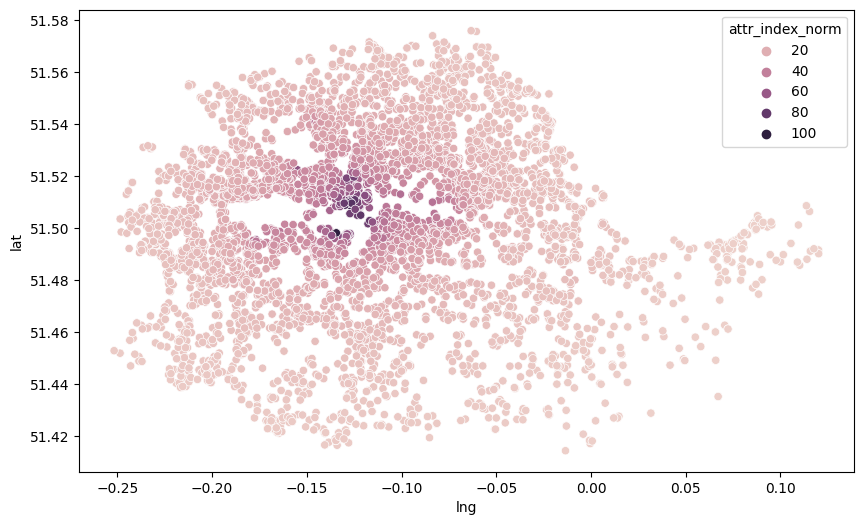

In [ ]:
london = all_cities_df[all_cities_df['city']=='london']
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.scatterplot(data=london, x='lng', y='lat', hue='attr_index_norm')
plt.show()

In [ ]:
#В париже/лондоне ближе к центру города индекс привлекательности района выше

Рим

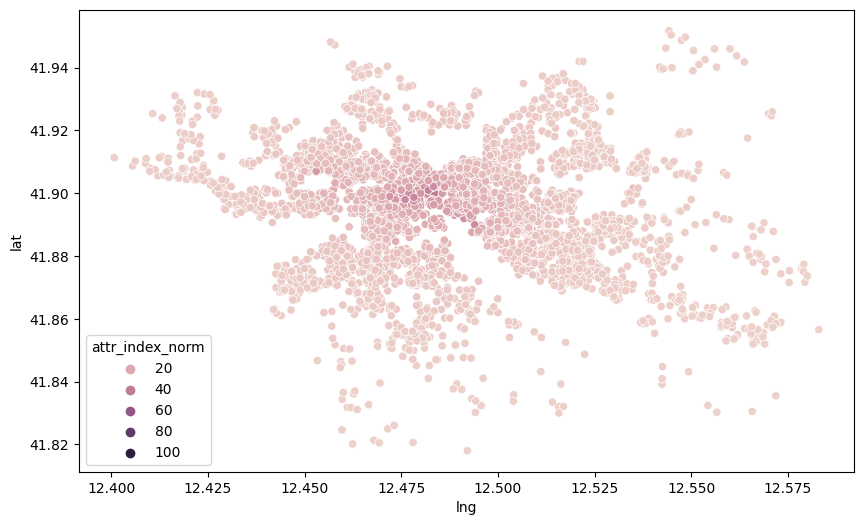

In [ ]:
rome = all_cities_df[all_cities_df['city']=='rome']
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.scatterplot(data=rome, x='lng', y='lat', hue='attr_index_norm')
plt.show()


In [ ]:
#В риме везде одинаково приятно останавливаться :)

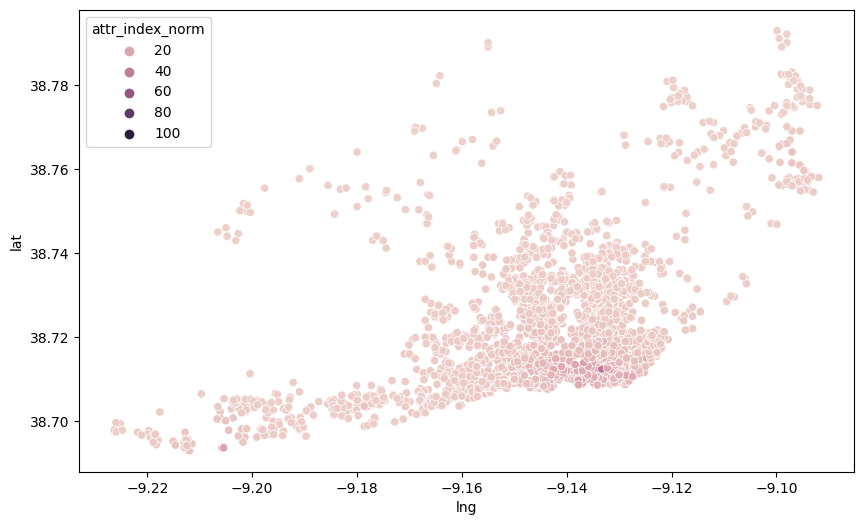

In [ ]:
city = all_cities_df[all_cities_df['city']=='lisbon']
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.scatterplot(data=city, x='lng', y='lat', hue='attr_index_norm')
plt.show()

# Анализ выбросов

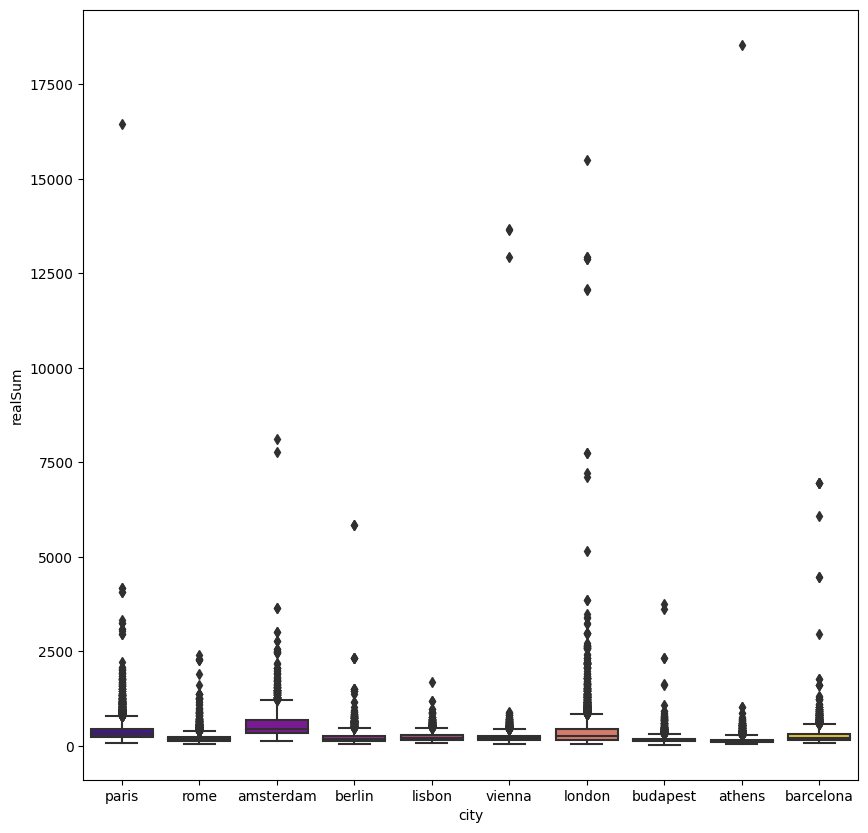

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=all_cities_df, x='city',y='realSum',palette='plasma')
plt.show()

Все очень плохо - много выбросов по realSum. Возможно надо будет их удалить

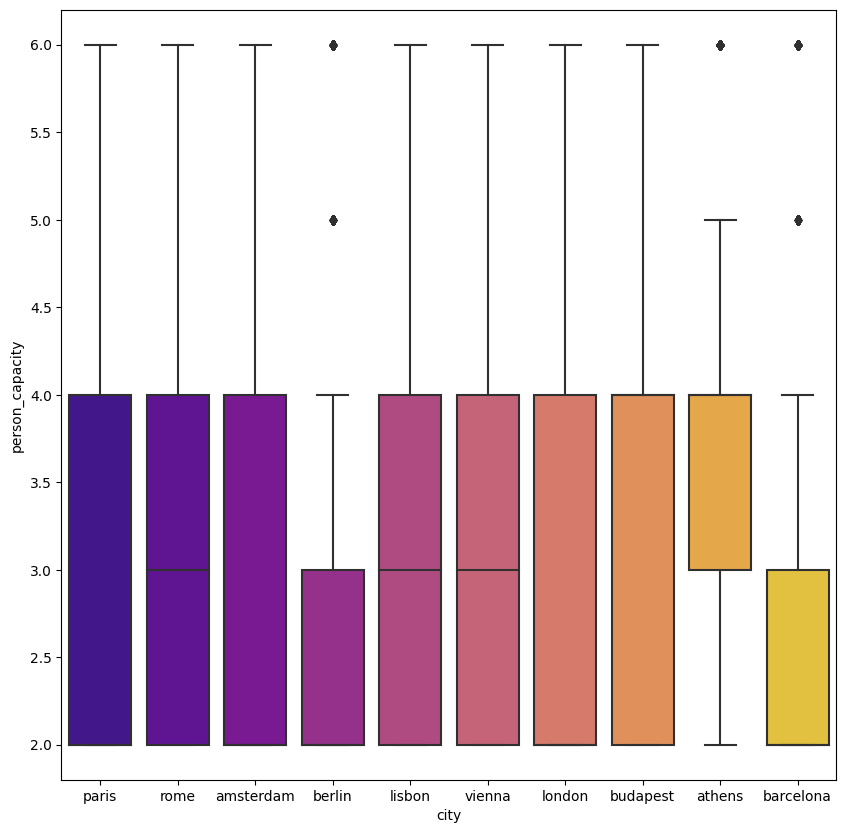

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=all_cities_df, x='city',y='person_capacity',palette='plasma')
plt.show()

Функция которая считает выбросы по каждой переменной по каждому городу отдельно

In [ ]:
def outliers(variable):

    #создаем датафрейм с двумя колонками - выбранной переменной и city
    W = all_cities_df[[variable,'city']]

    #считаем q1 и q3, а также число наблюдений - count
    q1 = W.groupby('city').quantile(0.25).rename(columns={variable: 'q1'}).reset_index()
    q3 = W.groupby('city').quantile(0.75).rename(columns={variable: 'q3'}).reset_index()
    count =  W.groupby('city').count().rename(columns={variable: 'count'}).reset_index()

    #соединяем все статистики
    W_sum = pd.merge(q1,q3, on='city', how='inner')
    W_sum = pd.merge(W_sum,count, on='city', how='inner')

    #считаем left_bound и right_bound
    W_sum['left_bound'] = W_sum['q1'] - 1.5*(W_sum['q3']- W_sum['q1'])
    W_sum['right_bound'] = W_sum['q3'] + 1.5*(W_sum['q3']- W_sum['q1'])

    # соединяем статистику с основной базой данной
    W_new = pd.merge(W,W_sum, on='city', how='inner')

    outliers = W_new.query(f'{variable}>=right_bound')
    outliers_count = outliers.value_counts('city').to_frame(f'{variable}_outliers')
    return outliers_count

In [ ]:
#создадим таблицу sum с количесвтом выбросов и процентом от числа наблюдений по каждому городу и каждой переменной
#общее кол-во наблюдений по каждому городу
sum = all_cities_df.groupby('city').size().reset_index(name='count')

#список переменных
float_columns = all_cities_df.select_dtypes(include='float64')
var = list(float_columns.columns)
var

#цикл запускающий функцию подсчета выбросов по каждой переменной
for i in var:
    out = outliers(i)
    sum = pd.merge(sum, out, on='city', how='left')

sum.fillna(0)

city  count  realSum_outliers  person_capacity_outliers  \
0  amsterdam   2080               105                       0.0   
1     athens   5280               293                     640.0   
2  barcelona   2833               227                     248.0   
3     berlin   2484               165                     252.0   
4   budapest   4022               223                       0.0   
5     lisbon   5763               192                       0.0   
6     london   9993               531                       0.0   
7      paris   6688               386                       0.0   
8       rome   9027               433                       0.0   
9     vienna   3537               151                       0.0   

   cleanliness_rating_outliers  guest_satisfaction_overall_outliers  \
0                          0.0                                  0.0   
1                          0.0                                  0.0   
2                          0.0                                  0.0   
3                          0.0                                  0.0   
4                          0.0                                  0.0   
5                          0.0                                  0.0   
6                          0.0                                  0.0   
7                          0.0                                  0.0   
8                          0.0                                  0.0   
9                          0.0                                  0.0   

   dist_outliers  metro_dist_outliers  attr_index_outliers  \
0            129                   87                   35   
1            158                  283                  454   
2             30                  135                   76   
3            146                  276                  174   
4            288                  328                   85   
5            513                  592                   83   
6            270                 1129                  412   
7             15                  176                  178   
8            160                  207                  161   
9            171                  237                  232   

   attr_index_norm_outliers  rest_index_outliers  rest_index_norm_outliers  \
0                        35                   26                        56   
1                       454                  593                       409   
2                        69                    9                         9   
3                       174                  111                       108   
4                        85                    1                         2   
5                        83                  157                       172   
6                       412                  423                       423   
7                       178                    5                        36   
8                       161                   99                        99   
9                       232                  194                       194   

   lng_outliers  lat_outliers  
0           116          46.0  
1           104          36.0  
2            40          29.0  
3            49          24.0  
4           136         115.0  
5           146         316.0  
6            62           0.0  
7             2           0.0  
8            99          30.0  
9            79          23.0

Если будем строить регрессию по realSum, то надо будет удалить выбросы по ней

# Матрица диаграмм рассеивания

In [ ]:
float_columns.head()

realSum  person_capacity  cleanliness_rating  \
0  296.159940              2.0                10.0   
1  288.237487              2.0                10.0   
2  211.343089              2.0                10.0   
3  298.956100              2.0                 9.0   
4  247.926181              4.0                 7.0   

   guest_satisfaction_overall      dist  metro_dist  attr_index  \
0                        97.0  0.699821    0.193709  518.478947   
1                        97.0  2.100005    0.107221  873.216962   
2                        94.0  3.302325    0.234724  444.556077   
3                        91.0  0.547567    0.195997  542.142014   
4                        82.0  1.197921    0.103573  406.928958   

   attr_index_norm   rest_index  rest_index_norm      lng       lat  
0        25.239380  1218.662228        71.608028  2.35385  48.86282  
1        42.507907  1000.543327        58.791463  2.32436  48.85902  
2        21.640840   902.854467        53.051310  2.31714  48.87475  
3        26.391291  1199.184166        70.463506  2.35600  48.86100  
4        19.809165  1070.775497        62.918272  2.35915  48.86648

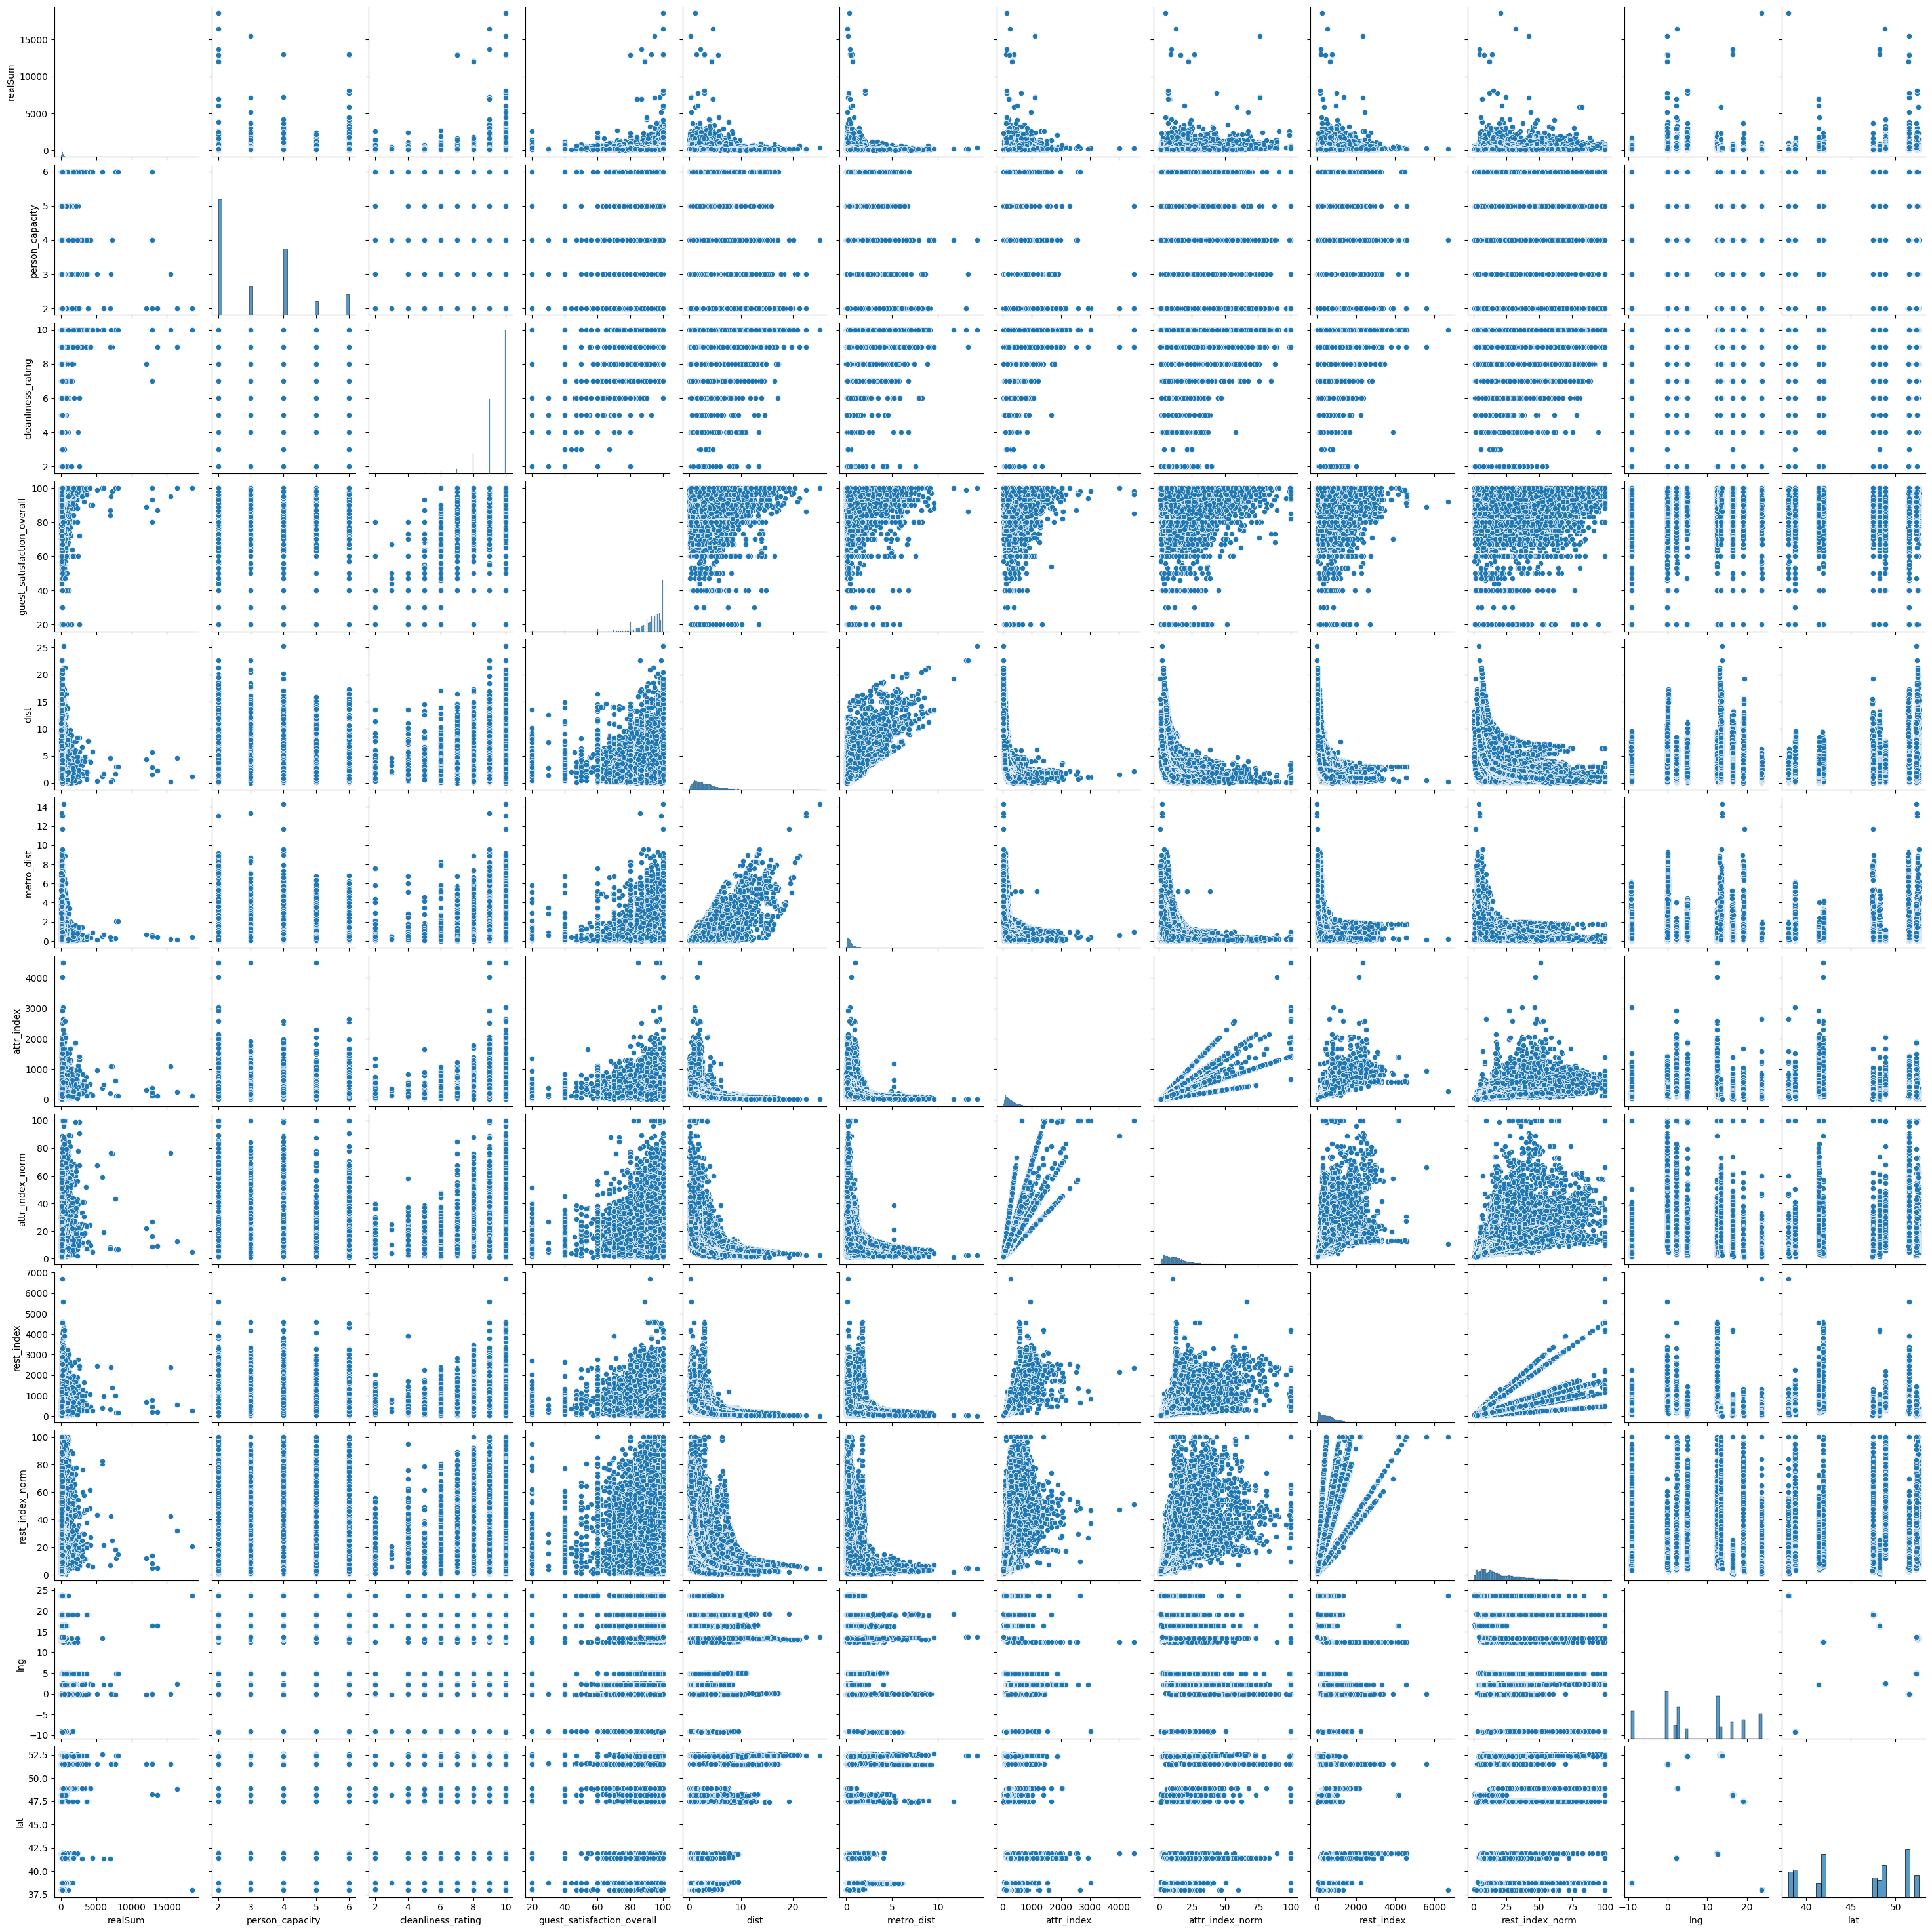

In [ ]:
sns.pairplot(float_columns)
plt.show()

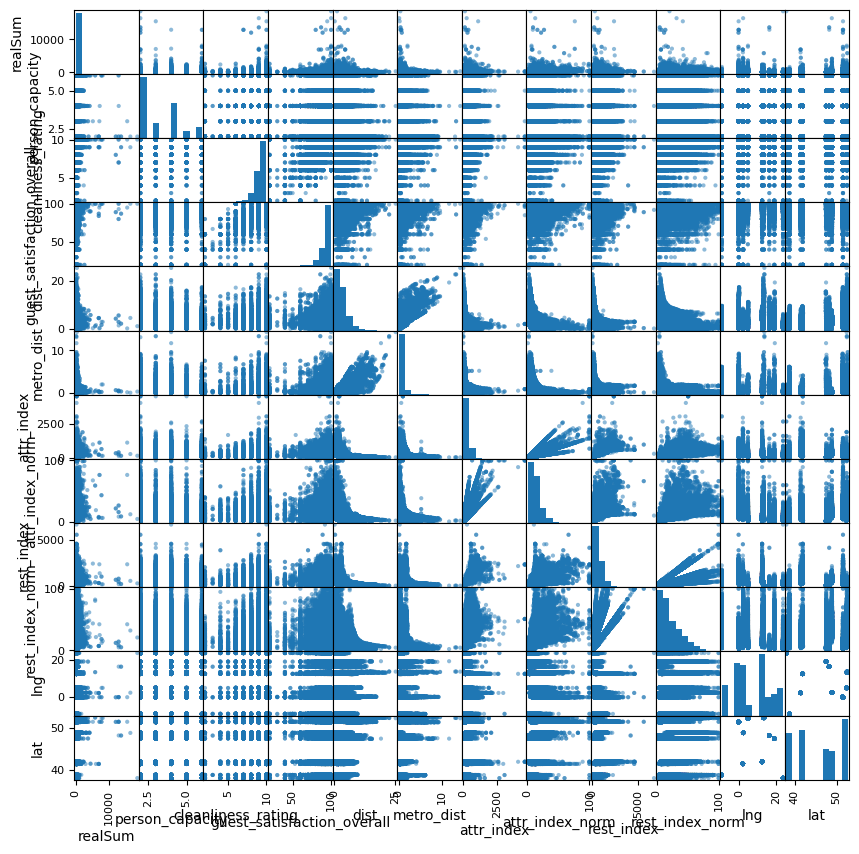

In [ ]:
pd.plotting.scatter_matrix(float_columns, figsize=(10, 10));

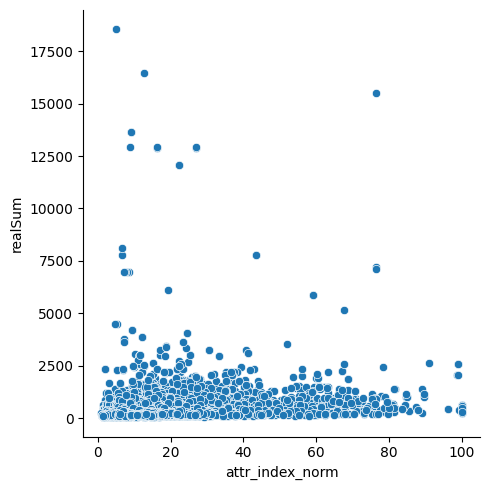

In [ ]:
#выведем один из графиков рассеивания для примера
#здесь мы видим что у realSum опять же есть выбросы
sns.relplot(data=float_columns, x="attr_index_norm", y="realSum")

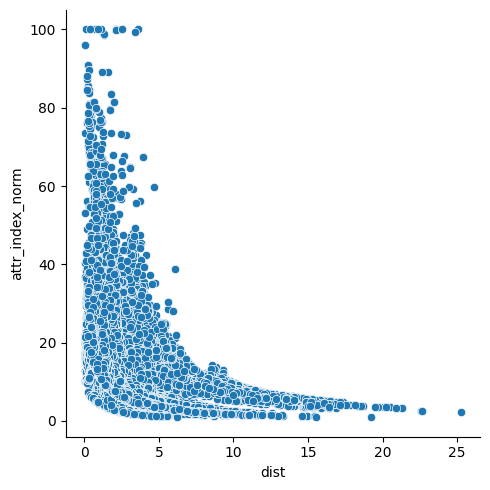

In [ ]:
#здесь мы видим нелинейную (возможно гиперболическую) зависмость индекса привлекательности района от дистанции от метро
#в основном квартиры расположены недалеко от метро, но те которые расположены далеко - привлекательность района резко снижается
sns.relplot(data=float_columns, x="dist", y="attr_index_norm")

- attr_index_norm * attr_index - линейная корреляция, но это логично, одна и та же инфромация просто нормированная
- dist * rest_index_norm и  dist * attr_index_norm - нелинейная завсимость - гипербола y = a + b/x

In [ ]:
weekdays_df = all_cities_df.query('week_status == "weekdays"')
weekends_df = all_cities_df.query('week_status == "weekends"')

# Как зависит общий рейтинг от индекса привлекательности района?
---



In [ ]:
all_cities_df.columns # снова откроем список элементов хедера, чтобы копировать их в код

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'city', 'week_status'],
      dtype='object')

In [ ]:
# отфильтруем датасет, включим первые строки
rest_rating = all_cities_df[['guest_satisfaction_overall', 'attr_index', 'rest_index']]
rest_rating.head(4)

guest_satisfaction_overall  attr_index   rest_index
0                        97.0  518.478947  1218.662228
1                        97.0  873.216962  1000.543327
2                        94.0  444.556077   902.854467
3                        91.0  542.142014  1199.184166

In [ ]:
# и приведём описательную статитиску после фильтрования датасета
rest_rating.describe()

guest_satisfaction_overall    attr_index    rest_index
count                51707.000000  51707.000000  51707.000000
mean                    92.628232    294.204105    626.856696
std                      8.945531    224.754123    497.920226
min                     20.000000     15.152201     19.576924
25%                     90.000000    136.797385    250.854114
50%                     95.000000    234.331748    522.052783
75%                     99.000000    385.756381    832.628988
max                    100.000000   4513.563486   6696.156772

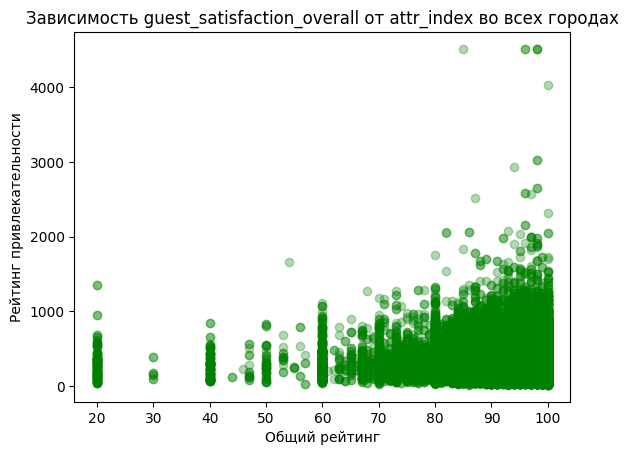

In [ ]:
# Оценим зависимость общего рейтинга от индекса привлекательности района.

x_column = 'guest_satisfaction_overall'
y_column = 'attr_index'
plt.scatter(rest_rating['guest_satisfaction_overall'], rest_rating['attr_index'], color='green', alpha=0.3)
plt.xlabel("Общий рейтинг")
plt.ylabel("Рейтинг привлекательности")
plt.title(f'Зависимость {x_column} от {y_column} во всех городах')
plt.show()


In [ ]:
# Диаграмма выгдядит довольно странно, как будто использовалась дискретная шкала общего рейтинга.
# Как в нём выглядят уникальные значения?
uniq_values_df = rest_rating['guest_satisfaction_overall'].unique()
uniq_values_df

array([ 97.,  94.,  91.,  82.,  93.,  90.,  95.,  99.,  89.,  80.,  96.,
        87.,  83.,  88.,  98.,  92.,  84., 100.,  85.,  86.,  65.,  79.,
        69.,  76.,  81.,  68.,  74.,  73.,  20.,  75.,  78.,  77.,  60.,
        71.,  50.,  70.,  40.,  64.,  67.,  53.,  63.,  72.,  57.,  55.,
        56.,  54.,  47.,  62.,  66.,  30.,  44.,  46.,  61.])

In [ ]:
# похоже, эти данные надо отсортировать в порядке возрастания, но выдать только первые и последние 7 значений

uniq_values_sorted = sorted(rest_rating['guest_satisfaction_overall'].unique())
first_and_last = uniq_values_sorted[:7] + uniq_values_sorted[-7:]
print(first_and_last)

[20.0, 30.0, 40.0, 44.0, 46.0, 47.0, 50.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


In [ ]:
# Действительно, дискретные. Интересно, чем это вызвано?

Формула линейной регрессии: y = -1.27 * x + 412.02


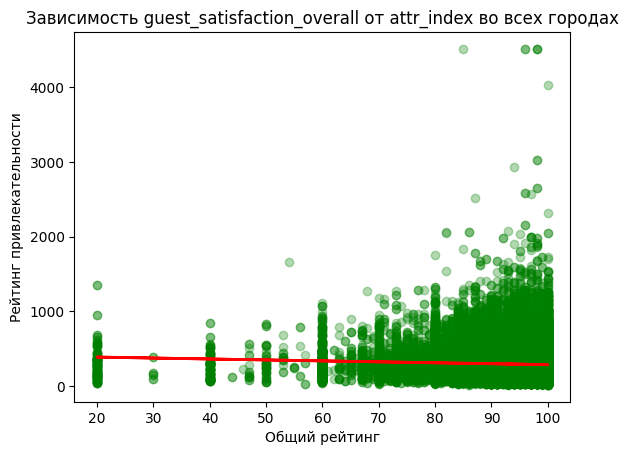

In [ ]:
# Добавим на график линию регрессии

x_data = rest_rating['guest_satisfaction_overall'].values
y_data = rest_rating['attr_index'].values

n = len(x_data)
slope = (n * np.sum(x_data * y_data) - np.sum(x_data) * np.sum(y_data)) / (n * np.sum(x_data**2) - (np.sum(x_data))**2)
intercept = (np.sum(y_data) - slope * np.sum(x_data)) / n

print(f'Формула линейной регрессии: y = {slope:.2f} * x + {intercept:.2f}')

plt.scatter(x_data, y_data, color='green', alpha=0.3)
plt.plot(x_data, slope * x_data + intercept, color='red', linewidth=2)
plt.xlabel("Общий рейтинг")
plt.ylabel("Рейтинг привлекательности")
plt.title('Зависимость guest_satisfaction_overall от attr_index во всех городах')
plt.show()

# Правда ли, что у суперхоста приятнее отдыхать?

In [ ]:
# Суперхост - это "качественный" хост, и у него действительно может быть приятнее
# Преобразуем булево значение в 0 и 1, чтобы построить диаграмму, так на булевых не график не строится

all_cities_df['host_is_superhost_int'] = all_cities_df['host_is_superhost'].astype(int)

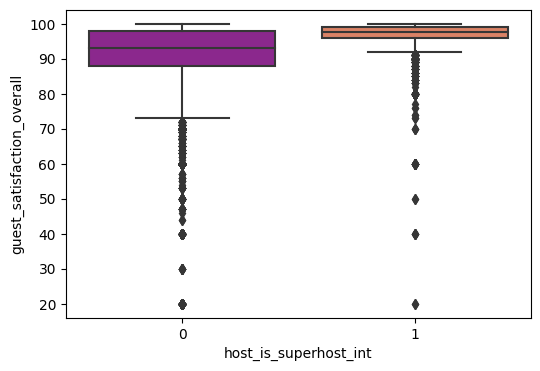

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.boxplot(data=all_cities_df, x='host_is_superhost_int', y='guest_satisfaction_overall', palette='plasma')
plt.show()

In [ ]:
# Оставим только те данные, что были собраны на рабочие дни
all_cities_df_weekdays = all_cities_df[all_cities_df['week_status'] == "weekdays"]

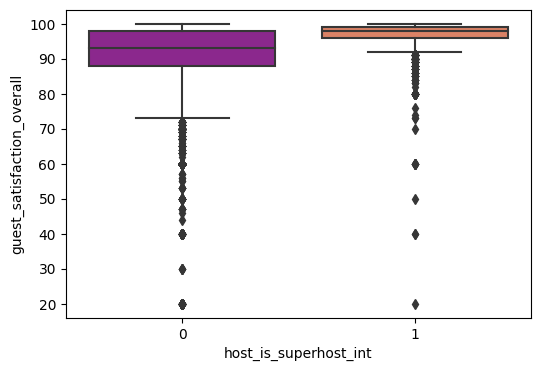

In [ ]:
# и повторим построение боксплотов
plt.figure(figsize=(6,4))
ax = sns.boxplot(data=all_cities_df_weekdays, x='host_is_superhost_int', y='guest_satisfaction_overall', palette='plasma')
plt.show()

In [ ]:
# Можно обрезать график, но также можно вывести средние значения в виде чисел

superhost_false = all_cities_df[all_cities_df['host_is_superhost'] == False]
mean_satisfaction_superhost_false = superhost_false['guest_satisfaction_overall'].mean()
superhost_true = all_cities_df[all_cities_df['host_is_superhost'] == True]
mean_satisfaction_superhost_true = superhost_true['guest_satisfaction_overall'].mean()
mean_satisfaction_superhost_false
print(f'Средний рейтинг {mean_satisfaction_superhost_false:.2f} если хозяин - несуперхост и {mean_satisfaction_superhost_true:.2f} если хозяин - суперхост.')

Средний рейтинг 91.16 если хозяин - несуперхост и 96.90 если хозяин - суперхост.


In [ ]:
# Выведем также медианные значения рейтинга в зависимости от типа хозяина
superhost_false = all_cities_df[all_cities_df['host_is_superhost'] == False]
median_satisfaction_superhost_false = superhost_false['guest_satisfaction_overall'].median()

superhost_true = all_cities_df[all_cities_df['host_is_superhost'] == True]
median_satisfaction_superhost_true = superhost_true['guest_satisfaction_overall'].median()

print(f'Медианный рейтинг {median_satisfaction_superhost_false:.2f} если хозяин - несуперхост и {median_satisfaction_superhost_true:.2f} если хозяин - суперхост.')


Медианный рейтинг 93.00 если хозяин - несуперхост и 97.50 если хозяин - суперхост.


In [ ]:
# Выведем медианные значения для датасета без данных о выходных днях
superhost_false = all_cities_df_weekdays[all_cities_df_weekdays['host_is_superhost'] == False]
median_satisfaction_superhost_false = superhost_false['guest_satisfaction_overall'].median()

superhost_true = all_cities_df_weekdays[all_cities_df_weekdays['host_is_superhost'] == True]
median_satisfaction_superhost_true = superhost_true['guest_satisfaction_overall'].median()

print(f'Медианный рейтинг {median_satisfaction_superhost_false:.2f} если хозяин - несуперхост и {median_satisfaction_superhost_true:.2f} если хозяин - суперхост.')

Медианный рейтинг 93.00 если хозяин - несуперхост и 98.00 если хозяин - суперхост.


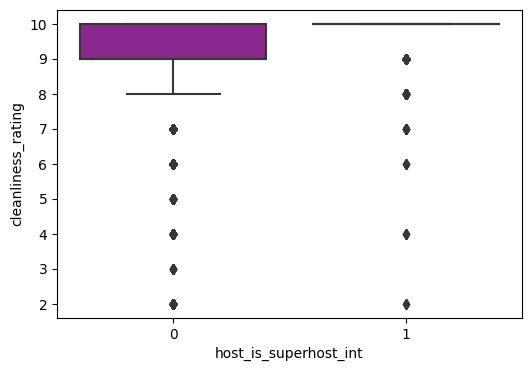

In [ ]:
# похоже, что суперхост каким-то образом делат жизнь постояльца лучше. Но каким?
# проверим, не связано ли это с рейтингом чистоты

plt.figure(figsize=(6,4))
ax = sns.boxplot(data=all_cities_df, x='host_is_superhost_int', y='cleanliness_rating', palette='plasma')
plt.show()

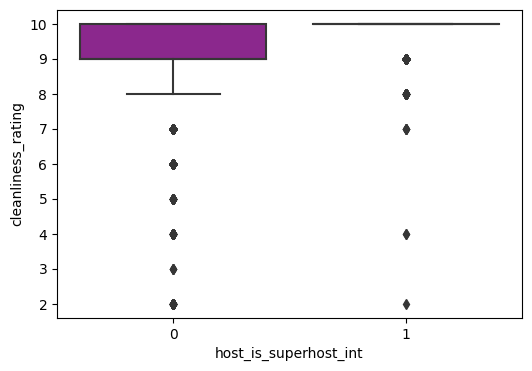

In [ ]:
# Проверим также на данных только по рабочим дням

plt.figure(figsize=(6,4))
ax = sns.boxplot(data=all_cities_df_weekdays, x='host_is_superhost_int', y='cleanliness_rating', palette='plasma')
plt.show()

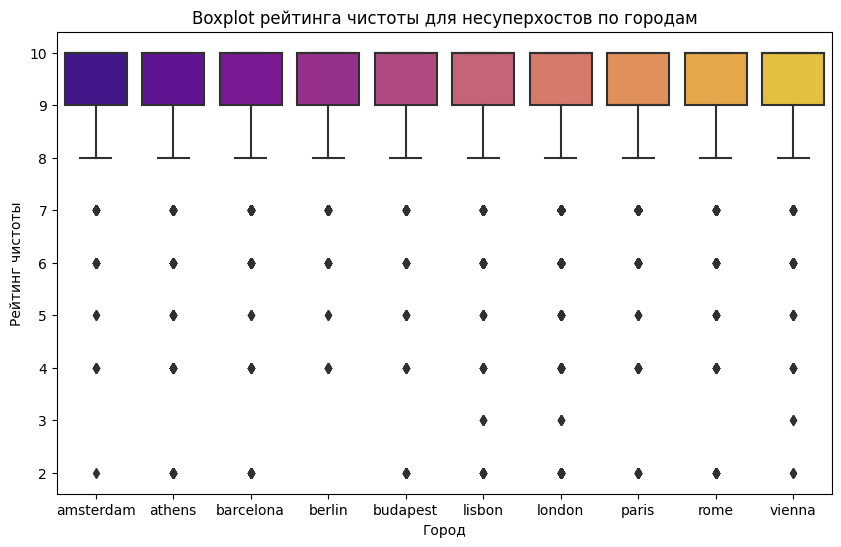

In [ ]:
# Точно! 10 против 9 у не суперхостов. Но и несуперхосты часто имеют получают рейтинг 10.
# В каких городах таких несуперхостов особенно много?

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=all_cities_df, x='city', y='cleanliness_rating', palette='plasma')

ax.set_title('Boxplot рейтинга чистоты для несуперхостов по городам')
ax.set_xlabel('Город')
ax.set_ylabel('Рейтинг чистоты')

plt.show()


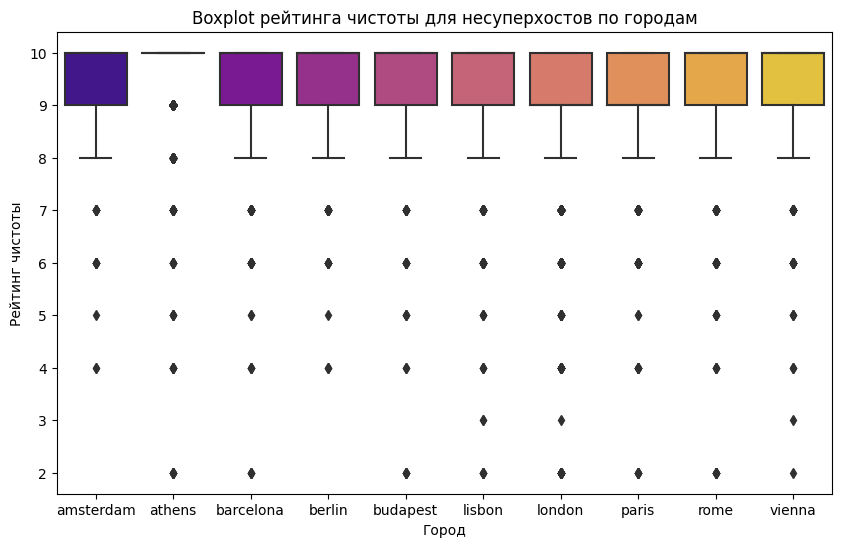

In [ ]:
# Повторим также на данных, которые касаются только рабочих дней

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=all_cities_df_weekdays, x='city', y='cleanliness_rating', palette='plasma')

ax.set_title('Boxplot рейтинга чистоты для несуперхостов по городам')
ax.set_xlabel('Город')
ax.set_ylabel('Рейтинг чистоты')

plt.show()

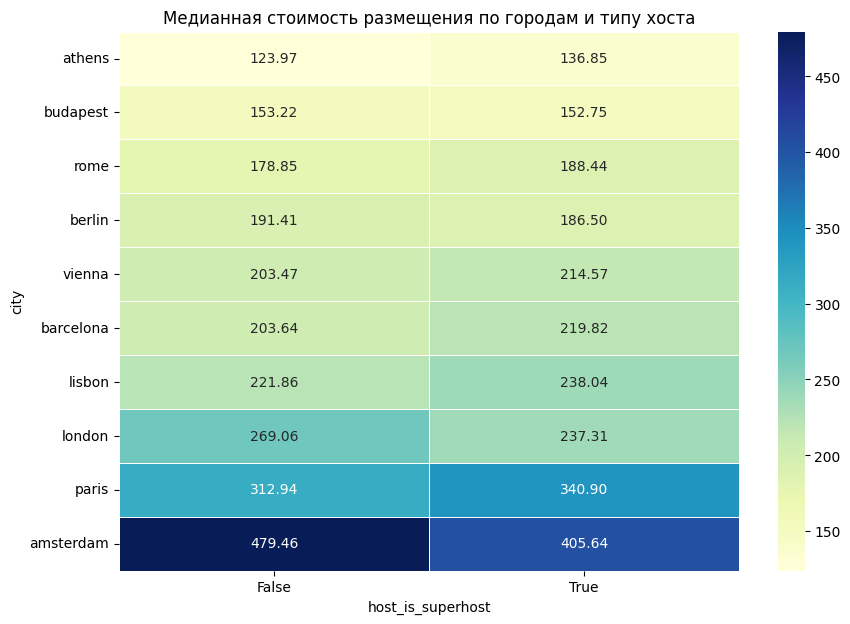

In [ ]:
# Да они везде молодцы! Особенно афинские несуперхосты, которые поддерживают хорошую чистоту рабочие дни
# Надо бы теперь посмотреть,
# Какова медианная стоимость проживания у суперхоста и не у суперхоста по городам

grouped_df = all_cities_df.groupby(['city', 'host_is_superhost'])['realSum'].median().reset_index()

# И создаем хитмап
plt.figure(figsize=(10, 7))
heatmap_data = grouped_df.pivot(index='city', columns='host_is_superhost', values='realSum')

# Сортируем ось Y (города) по медианной стоимости у суперхоста
order = heatmap_data.median(axis=1).sort_values().index
sns.heatmap(heatmap_data.loc[order, :], annot=True, fmt=".2f", cmap='YlGnBu', linewidths=.5)
plt.title('Медианная стоимость размещения по городам и типу хоста')
plt.show()

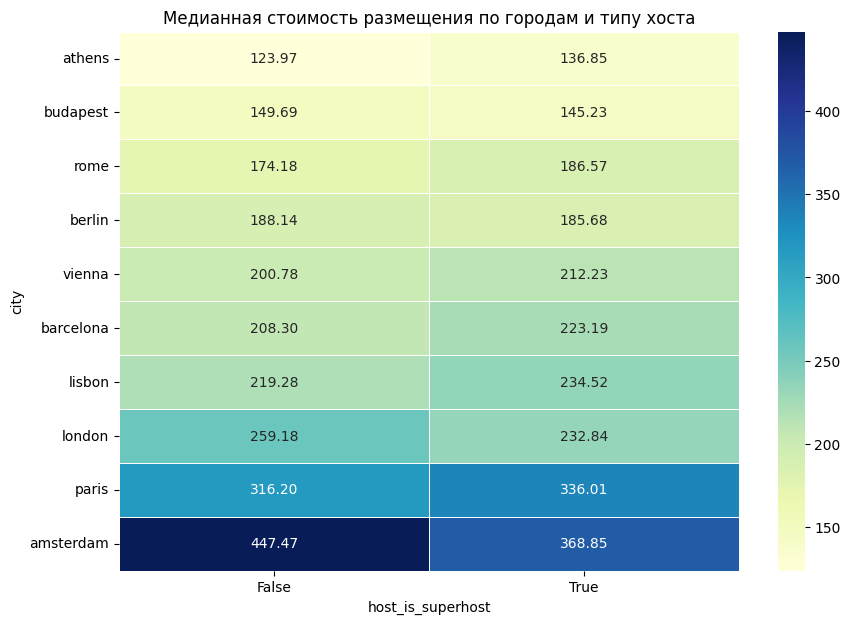

In [ ]:
# Повторим анализ с данными, из которых исключены выходные дни

grouped_df = all_cities_df_weekdays.groupby(['city', 'host_is_superhost'])['realSum'].median().reset_index()

plt.figure(figsize=(10, 7))
heatmap_data = grouped_df.pivot(index='city', columns='host_is_superhost', values='realSum')

# Сортируем ось Y (города) по медианной стоимости у суперхоста
order = heatmap_data.median(axis=1).sort_values().index
sns.heatmap(heatmap_data.loc[order, :], annot=True, fmt=".2f", cmap='YlGnBu', linewidths=.5)
plt.title('Медианная стоимость размещения по городам и типу хоста')
plt.show()

In [ ]:
# Как видим, в рабочие дни цена ниже.
# Удивительно то, что в некоторых городах несуперхосты берут больше! Что же у них есть такого по сравнению с суперхостами?
# Возьмём Амстертадам. Для этого сделаем небольшой датасет для Амстердама из общего.

# сразу же исключим выходные
# Заметим, что данные за все дни были похожи
amsterdam_data = all_cities_df_weekdays[all_cities_df_weekdays['city'] == 'amsterdam']

# А потом попробуем посмотреть на данные супер- и не суперхостов Амстердама

amsterdam_seperhost_true = amsterdam_data[amsterdam_data['host_is_superhost'] == True]
amsterdam_seperhost_false = amsterdam_data[amsterdam_data['host_is_superhost'] == False]

<ipython-input-69-f705d4284157>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = amsterdam_seperhost_true.corr(method='kendall')


<Axes: >

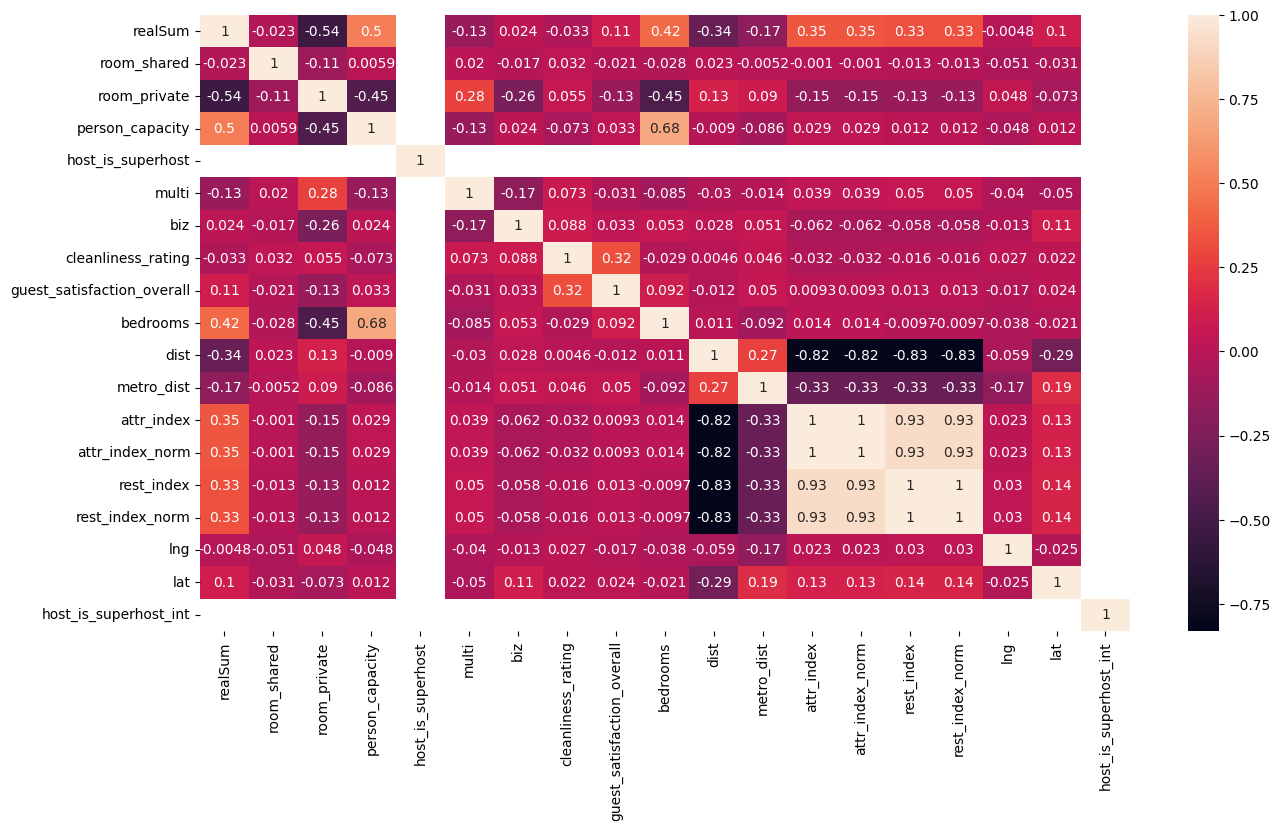

In [ ]:
# И сделаем корреляционные матрицы для супер и не супер

%matplotlib inline
corr = amsterdam_seperhost_true.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

<ipython-input-71-0fb84f60e73f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = amsterdam_seperhost_false.corr(method='kendall')


<Axes: >

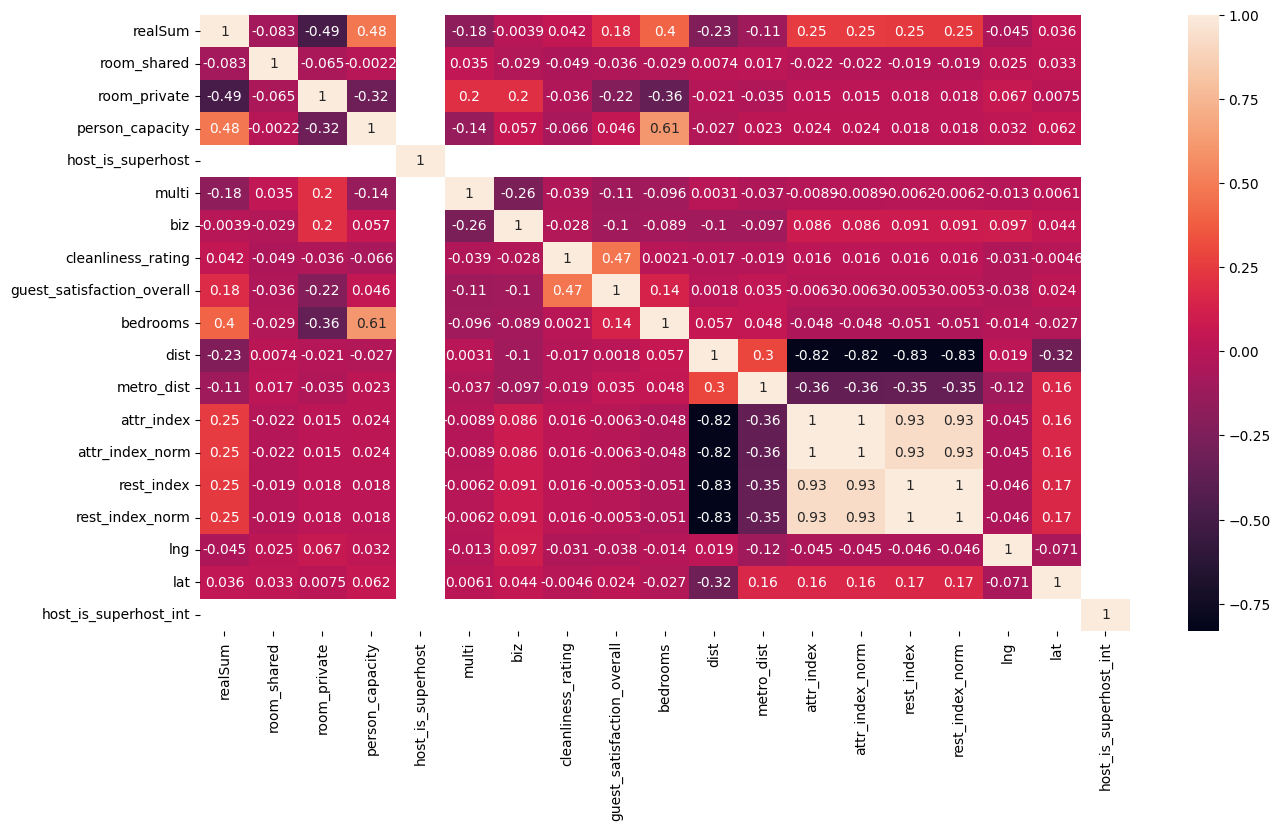

In [ ]:
%matplotlib inline
corr = amsterdam_seperhost_false.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

<ipython-input-72-f6d0d089408c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_difference = amsterdam_seperhost_true.corr(method='kendall') - amsterdam_seperhost_false.corr(method='kendall')


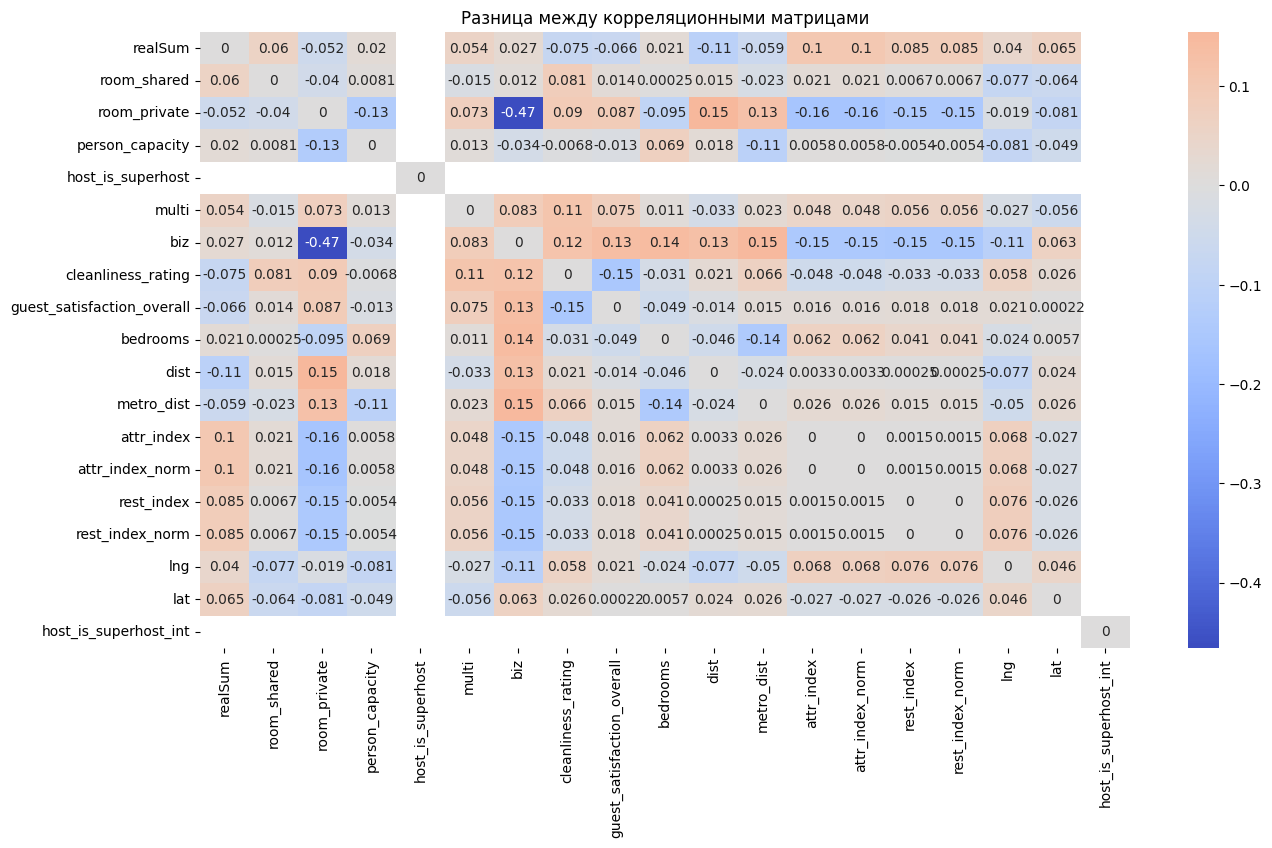

In [ ]:
# Можно глаза сломать рассматривая эти матрицы. Попробуем вычесть одну матрицу из другой, и посмотреть, что будет.

corr_difference = amsterdam_seperhost_true.corr(method='kendall') - amsterdam_seperhost_false.corr(method='kendall')

# Построение хитмапа для разницы
plt.figure(figsize=(15, 8))
sns.heatmap(corr_difference, annot=True, cmap='coolwarm', center=0)
plt.title('Разница между корреляционными матрицами')
plt.show()

In [ ]:
# Эта тёмная яма возможно является наиболее значимым фактором, определяющим, почему несуперхост берёт побольше
# Возможно cуперхоста Амстердама наличие частной комнаты не так часто связано с публикацией более 4х предложений
# Несуперхост, напротив, возможно чаще имеет более 4 предложений, связанными с частными команатами.
# Интересно это проверить

# Важность могут иметь и другие факторы. Такие как расстояние до центра города, до метро и чистота
# Попробуем вычислить диаграммы зависимости цены у несуперхоста Амстердама
# от перечисленных признаков. Другие признаки включать не будем, так как они кажутся менее значимыми
# Или они сами являются производной от других признаков. Так, клиент больше доволен, когда чисто и близко.

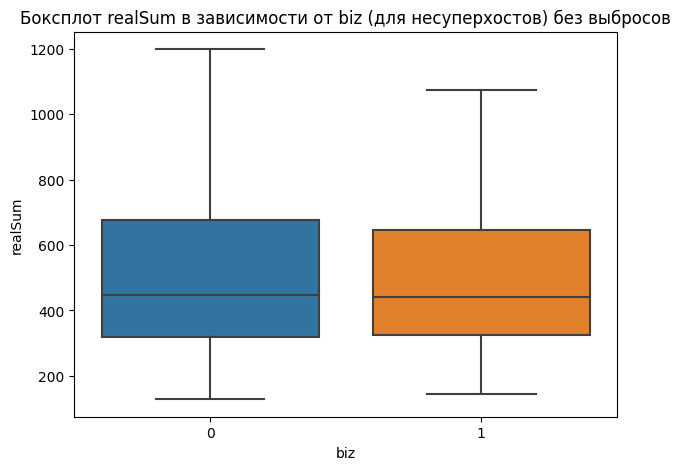

In [ ]:
# Сначала построим боксплоты для несуперхостов, которые покажут зависимость цены от наличия более четырёх
# Исключим выбросы

plt.figure(figsize=(7, 5))
sns.boxplot(x='room_private', y='realSum', data=amsterdam_seperhost_false, sym="")
plt.title('Боксплот realSum в зависимости от biz (для несуперхостов) без выбросов')
plt.xlabel('biz')
plt.ylabel('realSum')
plt.show()

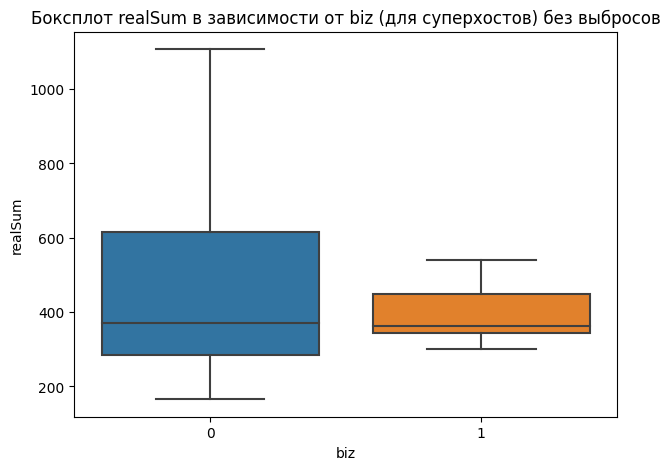

In [ ]:
# Повторим для суперхостов

plt.figure(figsize=(7, 5))
sns.boxplot(x='biz', y='realSum', data=amsterdam_seperhost_true, sym="")
plt.title('Боксплот realSum в зависимости от biz (для суперхостов) без выбросов')
plt.xlabel('biz')
plt.ylabel('realSum')
plt.show()

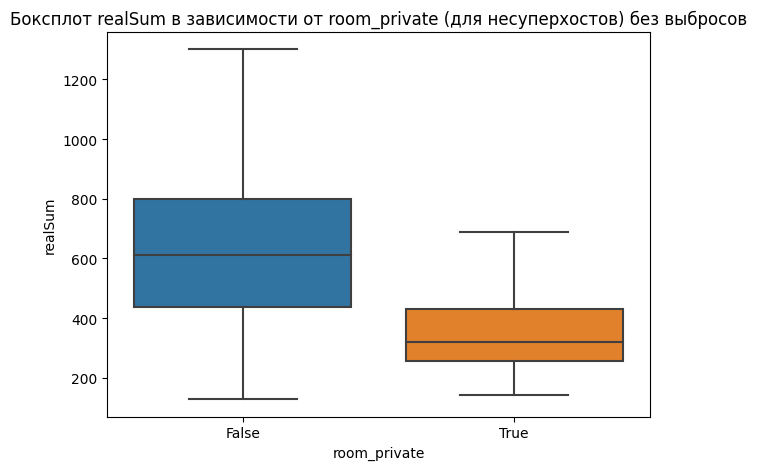

In [ ]:
# Теперь построим боксплоты для несуперхостов, которые покажут зависимость цены от наличия частной комнаты
# Исключим выбросы из картинки

plt.figure(figsize=(7, 5))
sns.boxplot(x='room_private', y='realSum', data=amsterdam_seperhost_false, sym="")
plt.title('Боксплот realSum в зависимости от room_private (для несуперхостов) без выбросов')
plt.xlabel('room_private')
plt.ylabel('realSum')
plt.show()

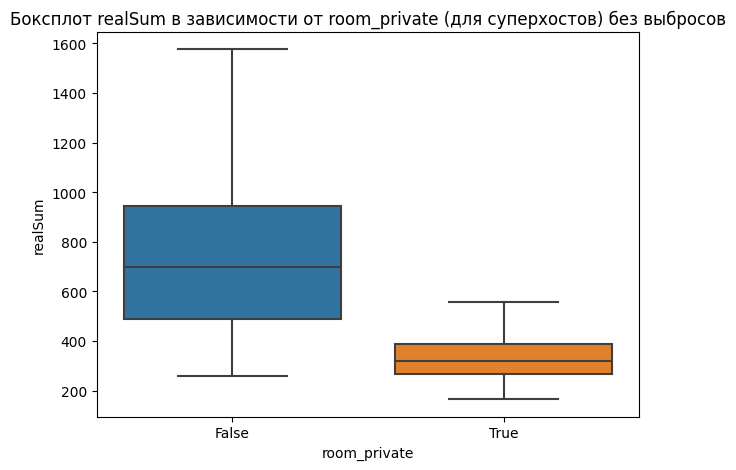

In [ ]:
# Теперь для суперхостов

plt.figure(figsize=(7, 5))
sns.boxplot(x='room_private', y='realSum', data=amsterdam_seperhost_true, sym="")
plt.title('Боксплот realSum в зависимости от room_private (для суперхостов) без выбросов')
plt.xlabel('room_private')
plt.ylabel('realSum')
plt.show()

In [ ]:
"""
А вот тут наконец-то стало видно, что средняя цена проживания в отсутствие фактора частной комнаты
у суперхоста выше, чем у несуперхоста.
Но частная комната у несуперхоста дороже, чем у хоста. Проверим это.
Проверим также число таких предложений - сколько суперхостов Амстердама с частной команатой и без таковой,
и сколько несуперхсотов

In [ ]:
# Выведем средние значения цены частной комнаты
amsterdam_seperhost_false_private_costs = amsterdam_seperhost_false[amsterdam_seperhost_false['room_private'] == True]
median_realsum_superfalse_private = amsterdam_seperhost_false_private_costs['realSum'].mean()

amsterdam_seperhost_true_private_costs = amsterdam_seperhost_true[amsterdam_seperhost_true['room_private'] == True]
median_realsum_supertrue_private = amsterdam_seperhost_true_private_costs['realSum'].mean()

print(f'Средняя стоимость частной комнаты составляет {median_realsum_superfalse_private:.2f} если хозяин - несуперхост и {median_realsum_supertrue_private:.2f} если хозяин - суперхост.')

Средняя стоимость частной комнаты составляет 375.43 если хозяин - несуперхост и 352.02 если хозяин - суперхост.


In [ ]:
# на двадцать три евро дороже у несуперхоста!
# Посмотрим теперь долю супер и несуперхостов с частной комнатой

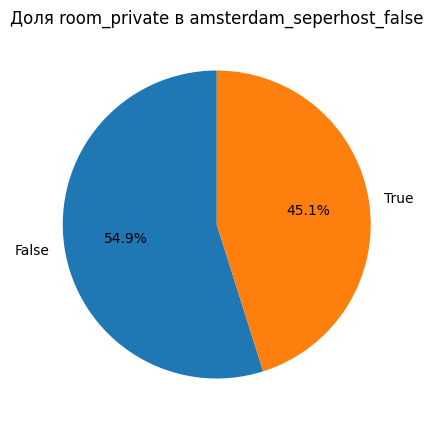

In [ ]:
plt.figure(figsize=(7, 5))
room_private_counts = amsterdam_seperhost_false['room_private'].value_counts()
plt.pie(room_private_counts, labels=room_private_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Доля room_private в amsterdam_seperhost_false')
plt.show()


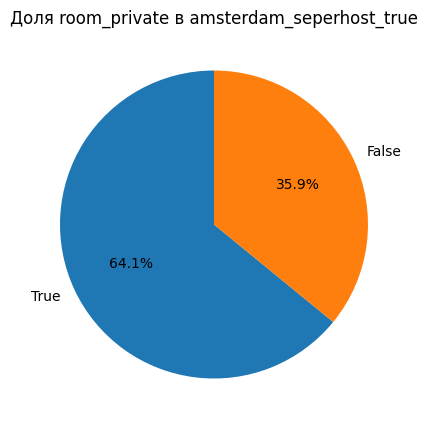

In [ ]:
plt.figure(figsize=(7, 5))
room_private_counts = amsterdam_seperhost_true['room_private'].value_counts()
plt.pie(room_private_counts, labels=room_private_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Доля room_private в amsterdam_seperhost_true')
plt.show()

<ipython-input-99-67ff519b8b68>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_realSum = amsterdam_biz_true.corr(method='kendall')['realSum']


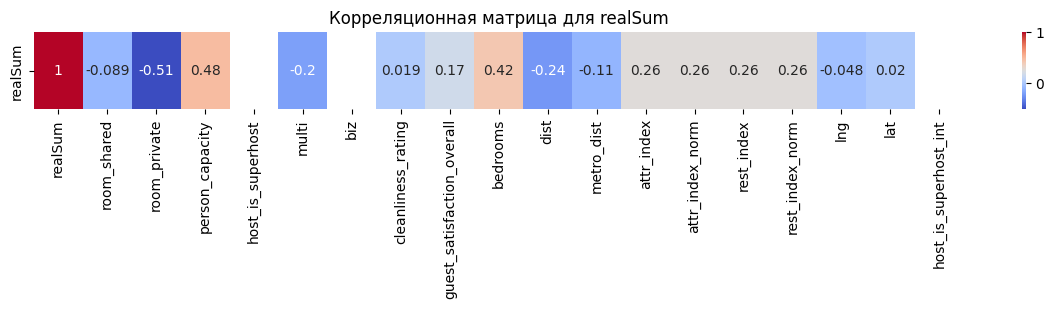

In [ ]:
# У суперхостов в среднем дешевле, и наличие более четырёх предложений создаёт довольно узкий разброс цен.
# Фактор "частная команата" всегда связан с меньшей ценой по сравнению с нечастной комнатой,
# но у несуперхостов эта комната стоит больше
# Несуперхосты предлагают такую команту чаще, чем суперхосты, и потому средняя цена на все
# предложения несуперхостов Амстердама выше


# Попробуем оценить другие факторы
# Создадим датасет с предложениями Амстердама, но только для случаев, когда хост не имеет более 4 предложений.
# А потом создадим корреляционную матрицу, но выведем только данные realSum у несуперхоста

amsterdam_biz_false = amsterdam_seperhost_false[amsterdam_seperhost_false['biz'] == False]

%matplotlib inline

# Выделение строки и столбцов, связанных с "realSum"
corr_realSum = amsterdam_biz_false.corr(method='kendall')['realSum']

# Построение корреляционной матрицы для "realSum"
plt.figure(figsize=(15, 1))
sns.heatmap(corr_realSum.to_frame().T, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица для realSum')
plt.show()

<ipython-input-100-070317871200>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_realSum = amsterdam_biz_true.corr(method='kendall')['realSum']


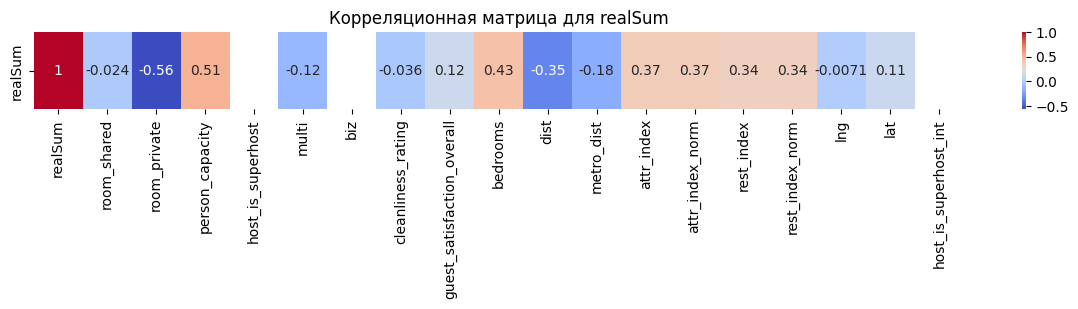

In [ ]:
# А теперь - у суперхоста

amsterdam_biz_false = amsterdam_seperhost_true[amsterdam_seperhost_true['biz'] == False]

%matplotlib inline

# Выделение строки и столбцов, связанных с "realSum"
corr_realSum = amsterdam_biz_false.corr(method='kendall')['realSum']

# Построение корреляционной матрицы для "realSum"
plt.figure(figsize=(15, 1))
sns.heatmap(corr_realSum.to_frame().T, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица для realSum')
plt.show()

In [ ]:
# Стоимость вообще не коррелирует с рейтингом чистоты у суперхостов
Наверное, всегда 10 баллов чистоты
# корреляция с другми факторами меньше, чем с фактором наличия частной команты
# надо сказать, что у суперхостов фактор частной команты - самый мощный признак, снижающий общую стоимость
# У несуперхостов тоже, но в меньшей степени. Возможно, они жадные

In [ ]:
"""
Наблюдения в датасете — объекты размещения на airbnb. Для каждого объекта указаны переменные:
realSum — Стоимость размещения за сутки (Numeric)
room_type — Тип комнаты или номера (Categorical)
room_shared — Есть комнаты совместного проживания (Boolean)
room_private — Есть частные комнаты (Boolean)
person_capacity — Максимальное кол-во постояльцев (Numeric)
host_is_superhost — Суперхост ли хозяин (Boolean)
multi — У хоста от 2 до 4 предложений на airbnb (Boolean)
biz — У хоста более 4 предложений на airbnb (Boolean)
cleanliness_rating — Рейтинг чистоты (Numeric)
guest_satisfaction_overall — Общий рейтинг (Numeric)
bedrooms — Количество спален (Numeric)
dist — Расстояние от центра города (Numeric)
metro_dist — Расстояние до ближайшей станции метро (Numeric)
lng — Долгота (Numeric)
lat — Широта (Numeric)
attr_index — индекс привлекательности района (Numeric)
attr_index_norm — нормализованный на интервал [0, 100] индекс привлекательности района (Numeric)
rest_index — индекс ресторанов в районе объекта (Numeric)
attr_index_norm — нормализованный на интервал [0, 100] индекс ресторанов в районе объекта (Numeric)
"""

'\nНаблюдения в датасете — объекты размещения на airbnb. Для каждого объекта указаны переменные:\nrealSum — Стоимость размещения за сутки (Numeric)\nroom_type — Тип комнаты или номера (Categorical)\nroom_shared — Есть комнаты совместного проживания (Boolean)\nroom_private — Есть частные комнаты (Boolean)\nperson_capacity — Максимальное кол-во постояльцев (Numeric)\nhost_is_superhost — Суперхост ли хозяин (Boolean)\nmulti — У хоста от 2 до 4 предложений на airbnb (Boolean)\nbiz — У хоста более 4 предложений на airbnb (Boolean)\ncleanliness_rating — Рейтинг чистоты (Numeric)\nguest_satisfaction_overall — Общий рейтинг (Numeric)\nbedrooms — Количество спален (Numeric)\ndist — Расстояние от центра города (Numeric)\nmetro_dist — Расстояние до ближайшей станции метро (Numeric)\nlng — Долгота (Numeric)\nlat — Широта (Numeric)\nattr_index — индекс привлекательности района (Numeric)\nattr_index_norm — нормализованный на интервал [0, 100] индекс привлекательности района (Numeric)\nrest_index — и